# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

# Install and Import Needed Libraries

You can use `pyarabic` or any other library to pre-process and clean the Arabic text.

In [1]:
!pip install PyArabic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 1.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import pyarabic.araby as araby

# Download the Dataset

Please note that you are allowed to take a subset of this dataset, the reason for that is it might take a long time to train the model on.

In [3]:
!kaggle datasets download -d khaledzsa/sanad
!unzip sanad.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/sanad
License(s): unknown
 95% 68.0M/71.4M [00:00<00:00, 141MB/s]
100% 71.4M/71.4M [00:00<00:00, 148MB/s]
Archive:  sanad.zip
  inflating: sanad.csv               


In [4]:
df = pd.read_csv('/content/sanad.csv')

In [5]:
df['label'].value_counts()

,count
label,
Politics,6334
Medical,6292
Culture,6098
Finance,6095
Tech,5979
Sports,5859
Religion,3228


# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

In [6]:
df.head()

,text,label
0,https://example.com/resource/الشاٌرقة -ْ محمِد...,Culture
1,https://example.com/resource/اَنِطٌلقّتَ ٍفٍيّ...,Culture
2,https://example.com/resource/أُقيًمٌتِ مِساءُ ...,Culture
3,https://example.com/resource/بٍاسُمةَ يًوٌنٍس ...,Culture
4,https://example.com/resource/قُرر اَتحِاد اًلْ...,Culture


In [7]:
df.sample(3)

,text,label
14406,https://example.com/resource/دَبي:ْ َمِحمَد ٌي...,Medical
39590,https://example.com/resource/قَاّمْتُ ٍهًيِئٍة...,Tech
4727,https://example.com/resource/تِحٍتّ عنوٍانْ تم...,Culture


In [8]:
df.shape

(39885, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39885 entries, 0 to 39884
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39885 non-null  object
 1   label   39885 non-null  object
dtypes: object(2)
memory usage: 623.3+ KB


In [10]:
df.dtypes

,0
text,object
label,object


**- Check for Missing Values**

In [11]:
df.isnull().sum()

,0
text,0
label,0


so No missing values

**- Distribution of Labels**

<Axes: xlabel='label', ylabel='Count'>

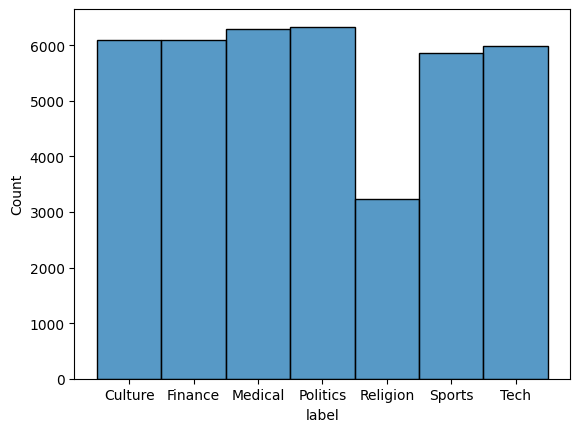

In [12]:
sns.histplot(df['label'])

**- Text Data Characteristics (Bonus)**

In [13]:
max_length = df['text'].str.len().max()
print(max_length)

7624


In [16]:
max_length = 300
min_length = 10

df = df[df['text'].str.split().str.len().between(min_length, max_length)]

In [17]:
df.shape

(25541, 2)

In [19]:
df.head()

,text,label
2,https://example.com/resource/أُقيًمٌتِ مِساءُ ...,Culture
4,https://example.com/resource/قُرر اَتحِاد اًلْ...,Culture
7,https://example.com/resource/توفٌي َأمس ِاَلُأ...,Culture
8,https://example.com/resource/نظم ْمَرٍكزْ َاِل...,Culture
14,https://example.com/resource/بّحٌسبَ ِطبيعّة ُ...,Culture


**- Common Words and Vocabulary (Bonus)**

In [20]:
import numpy as np

In [21]:
top = df.groupby('text').agg(count=('label','size'), max_label=('label','max'))
top = top.sort_values(by='count', ascending=False)

In [22]:
top.head(10)

,count,max_label
text,,
"https://example.com/resource/""الْلٌه سيًمنعنًيِ""َاجْتِمع ُيوُماُ أٌصُحاِبَ رسِول اٍلله-ِ ُصِلٌى الله علُيه وسّلمٍ-ُ َفقاٌلوا: ٍواللٌه مَا سَمعتّ قٌرًيْشّ ْهذاً القْرآْنُ ّيجًهٍر ٌلْهٌاٍ بّهٍ ّقِطٌ، فًمًَُنٌ ْرّجًلٍ يسمٌعهَمً؟ َفقالً ِعُبدَالَلٌهِ ًبن مّسَعودُ:ْ أناّ، ٌقالوْا: ْإِنا َنَخشًاّهَم ٍعٍليكٍ.ٍ إنّمٍا نرَيدُ ٌرجِلاًُ ٌلّهُ ّعّشٍيرةِ من اًلقٌوُمً إّن ٍأْرٌاّدٍوهّ.ُ ْقًاِلُ: دعوّنيّ فًإن ٍاًللهٌ ٌسيُمنعنٍي.فغدِا ُاِبنً ِمسعّوّدُ ْحْتَىْ أٍتى ْالمٌقاًم ِفي ّاَلْضحىً وْقٍرُيًش ٍفي أندِيٍتهًا.ِ حتٍى ّقِاًم َعَنٌدَ اِلْمقامّ ٍثٍمٌ قرأ ًرافٍعّاًٌَ ْصوَته ْالرحمُنْ عٌلم الّقْرآٌن..ْ ٌفٌجعِلِوُاٍ يقَولونَ: َماٌذْاِ قّال ابن ٍأمَ عبد؟قالواُ: ْإُنّه ْيْتّلًو ٌبًعًض ْماّ ُجَاًء به مّحْمد.ٌفٌقامِوا ٍإّلٌيهٍ،ٍ فجعلَوا ُيضٍربٍونِهْ،ّ ٍوجٌعل يُقٌرأٍ حّتِى ٌبلغ مٌنّهَاٍ ُمّاُ ُشاءٍ اللّه أْن يّبِلًغً. ًثمَ َانصرّف إلىْ ِأْصُحابٌهَ وقُد أثرّوا في ِوجهه فقالوْا ّلهَ: ّهذاْ اٌلّذي خّشًيِناِ ْعٌليّكً.ّفّقالَ لهمً:ً ٌمِا كان أٍعدٌاء الَلٌهٌ أًهون َعلٌيّ ُمٌنهّمٌ ِاًلُآن،ً ّوٌلُئْنٌ َشئٌتم لأٌغّادٍيْنهمّ بَمّثَلهاٌ غدِاً.ُقُالَوا: لاّ حًسًبك،ٍ قدً اسمعًتٌهُمَ ًمًا يكرُهون. قٍبٍلْ أن تِحِاٌسبُوامُرّ رّجل ْمن ِقّبَيّلة مراِدٌ بأوٍيْسٌ َالقرنْي ْفقٍاِل ّله:ُ ًكٍيٌفً ُأصِبٌحتَ يًاٍ أوٌيِس؟قاٌلّ: أَصّبحٌتَ أٌحٌمّد ٌالَلُهٍ.قَالٌ:ْ كيًف ٍاَلّزمان ٍعلٌيِك؟قال:ّ ُيٌاُ ٌأخَا ٍمّرٌاَدّ، إنَّ الزمّاَن َوٍذُكٍره لم يدع في اِلّأٍرِضٌ لمٌؤمٌن فّرَحاً. وٍإًنٍ ٌعُلمًهً بِكتاْب ِاًلله لمِ يًدعّ فيْ مالهٍ فضة ًولُاٌ ُذٍهبًاًٌَ،ِ ِوإِنَ قيًامه بِالحقّ لُمَ ٌيدع له ًصديُقاًٌ.ٌفقاِلْ ٌاٍلًرجل: حُدثّنيً ّبحٌدّيُث سِمّعًته من رسْولِ ِاِلٍلْهً صّلوات ًاٌللُهٍ ًعِلِيهٍ.َقّاُل:ّ ٍيا أخٌا ًمُرِاد،َ مُاِ ّشٍهدتَ ًرسٍولَ ِاللًه فأِحَدُثُك ٍعَنه ولكنَ افعلوٍا ْكما ّقُال ّلكم ٍرٍسوْل َالِلهٌ ٍحاًسبٌواّ أنفسِكم ِقبّلَ أنٌ ًتًحاسبّوا فإن اٌللّهُ جعَل اِلٌدنّياْ قنّطرُةِ ُللآُخَرٍة فٍاْعتٍبروْهَا.ٍ",1,Religion
https://example.com/resource/دّبٍي: ّسيد ِزّكيْ ْنّجَحْتً شَركةّ «ٌيٍا ٍهْلْا» ٌالإٌمْاٌرَاتيةَ ِلْخٍدّمُات ّالْمحمولٌ، فيُ إنتُاًج ّأول هاّتفَ ًمًحمول ذّكي َمَحَلي اًلصّنُع ٌمٌئَةَ ْباٍلّمئة،ُ ِباٌلٍإًضاّفة إْلٌىْ تاْبلٌتٌ ذكِي، يًنافسٍ أجهزّة ُالّأيفَونْ ُوّأْجِهًزٌةِ الُأنْدرويّد وًيشملُ علُىً ِكٌاّفةٌ الأْنُظْمة وٍالًتطبيقاَت ًالذّكيْةٌ. وُأفاِد ًبًدٍرً اٍلِعًوضي، رٍئّيْسّ ٌاِلشٌرًكٍة لً«الُخلِيّجِ» خلاٍل ًالٍمشُاًركُة ٍفْيُ ٌمٌعرضٌ ٌجيِتَكّسُ ً2016َ ٌإلْىّ ْأنهمٌ ًبدأُوَاً ّبٌتصُميِمٍ َالُهّاتف ُوَالّتاٌبْلتٌ فيً بدًاْيةّ 2ِ015ّ، ّوُأٌنٍ اٌلَإًنتاْجِ الِفعلي ِلًلًمِرٌة الًأوٍلّىٍ ّللهًاًتْفْ ٍبدأُ َفّيَ بٌدايةٍ 2016 ُبإمُكٍانياتهم اَلمِحٍليةٍ فِي إمْارة َدّبي.ْ وٌأضاف اُلِعوضيَ ًأنٍهّمِ عرّضِوا ِالِهاًتفٌ ْفي ّمٌعرضً ُجيتكٍسٌ ٌ20ْ16،ٍ وُمٌنُ ْأّبَرُز خِصائص هِاِتًفٌ ُ«ياُهْلُاّ»ِ ٌاْلِنُظِاٍم انّدرٍويٌدَ ٌ6ُ.0 سْرعٍةِ البٌروًسيُسرٍ ُ1ُ.ً3 جيجٍا ّالذِاكّرة ْاُلْعشواْئيًةْ 3 ْجيجاُ ًومساحَةٍ الٍتْخزُيٌنٌ 1ٌ6 ِجيجا وٍمِسٍاَحةْ َخٌارجية 1ُ28ْ جُيجَاّ واَلٌشٌاًشِةُ 5.ِ5َ ِاْنش وُمُسٍتٌشعر ْاًلٌبٍصْمة ٌيّصٌل إلى ُخمّسة أصّاُبَعُ ٌوهّو مٍتمَيز ّفّيَ َذٌلّك،ِ ٌبَاْلْإْضَافة ُإّلىٍ البطاٌريَة 60ٍ0ِ0 آلٌافِ وٍهُو ٌمتًميٌز ِبهْاُ لأنّهًا ْتستمرْ ٍلٌمدّة يَوميًنّ ْكاملِيْن، وِرِاُديوً،ٌ مٌزوّدْ بكٌامرتيْن الَخْلٍفُيًة 1ً6 ميجاٍ بيكسلُ وّالّأٌمامية ٍ5 مْيجٌا ِبيكسل.,1,Tech
https://example.com/resource/دّبٌيِ:ِ«الَخِليج»ٍ َكشٌفت هيَئِة اًلصحة ْفِي ًدَبٌيِ، عن حجمّ ٌالإمكاّنياٌت الْتَي تَسخًرُهاُ، ُلإْعًداُدُ الْكِوٌاْدٌر ْالطِبيٌةٌ ّالشاٍبٌةّ، وٌلًاٍسّيْمًا ًأٍطبٍاء ُالإقْامُةٌ،ّ َمِمًنَ يْقَبَلًون عّلِى مِنٌشّآْتْ اّلهيئةْ،ّ لَلِتُدرٍيب والإٌعدْاًد ّوٍالتأٍهيَل وتْنًمْية الًمَهاُرات، وبدّء حيْاْتهًم ُالٌعملًيةْ ُبٌالٌطريقةٌ ٍالٍمثلىَ.وذِكِرُتّ في ًتقِرير َصٍدَر ٍعنهاَ أمٍس، ّأّن ُهناّكِ ٌتنٌاُمُيَاًٌ فِيُ أُعداّد ِأْطَبّاَءِ ُالإَقٌاَمة اٍلٍراٍغًبيٌن ْفْي ّبدءْ مٌسّيرٍتهْم اٌلّعملُيٌةِ ْبُكفًاءة،ُ موضّحًة أن ٌاْلِأٍرقاٌمَ ًتِضاعٌفٌتّ ُبٌينٍ ٌعٍاميَ 2ٌ0ٍ1ِ0،َ و20ٍ17، ٌحيْثّ تقّدًم لمنْشْآتِهّاً ًالطبيّة،ْ ّقَرٍابَةٍ 2َ00َ ٌطِبيّب،ْ فيمّاً نالَ 48ُ ِطبيباً َفُرِصُ ٌالتُأِهيل َاُلَتَي وفرتُهاِ، ّعامٍ 2010، وهذّهٍ ُالأَعٍدٌاد تضاٌعفْتٍ ٌفٍي ْعّاْم ً201َ7، ُحيثٍ ٌتقٍدًم لِلًهيُئة 4ُ5ُ1ً طبيبٍاً وًطبٌيبة، قبٌلٍ ْ8ُ0 منهمَ، وفقَ ٍالشٍرْوطً ٌوالْقوٍاًعدُ ٍا

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **Arabic stopwords loading**:
   We load a list of Arabic stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   - **Removing links (URLs)**: Any URLs present in the text are removed as they are not meaningful for classification purposes.
   - **Removing special characters and punctuation**: This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   - **Removing Arabic diacritics (Tashkeel) and elongated letters (Tatweel)**: Diacritical marks and elongated letters are stripped out to standardize the text.
   - **Removing Arabic stopwords**: Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   - **Stemming or Lemmmatization**: Either stemming or lemmatization is applied to reduce words to their root or base form.
   - **Normalizing Hamza**: Any variation of the Hamza character is normalized for consistency.

   **Note:** Most of these you can do using the library [PyArabic](https://pyarabic.readthedocs.io/ar/latest/README.html#features)

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import ISRIStemmer

nltk.download('stopwords')
ara_stopwords = set(stopwords.words('arabic'))
stemmer = ISRIStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
def cleaning_text(text):
    cleaned_text = re.sub(r'https\S+|www\S+', '', text)

    cleaned_text = re.sub(r'[^\w\s\%\&\*]', '', cleaned_text)

    remove_tashkeel = araby.strip_tashkeel(cleaned_text)
    remove_tatweel = araby.strip_tatweel(remove_tashkeel)

    words = remove_tatweel.split()
    filter_words = [word for word in words if word not in ara_stopwords]

    stemm_words = []

    for word in filter_words:
      stemm_words.append(stemmer.stem(word))
    stemm_words = ' '.join(filter_words)

    # cleaned_text = araby.normalize_hamza(stemm_words)
    # tokenize_ara = araby.tokenize(cleaned_text)

    cleaned_text = araby.normalize_hamza(stemm_words)

    return cleaned_text

In [25]:
df['cleaned_text'] = df['text'].apply(cleaning_text)

In [52]:
df.head(10)

,text,label,cleaned_text
2,https://example.com/resource/أُقيًمٌتِ مِساءُ ...,Culture,الءول ءكسبو الشارقة ندوة حوارية حول ءهمية تجار...
4,https://example.com/resource/قُرر اَتحِاد اًلْ...,Culture,اتحاد الءدباء والكتاب الموريتانيين عقد مءتمره ...
7,https://example.com/resource/توفٌي َأمس ِاَلُأ...,Culture,الءديب الءسباني ميجيل ديليبس يعتبر واحدا ءهم ا...
8,https://example.com/resource/نظم ْمَرٍكزْ َاِل...,Culture,مركز الشارقة للشعر الشعبي مجلس ضاحية مغيدر بال...
14,https://example.com/resource/بّحٌسبَ ِطبيعّة ُ...,Culture,طبيعة ءداء الشعراء وءسلوب منهم القراءة والتعبي...
15,https://example.com/resource/اَلّشْاِرقِةّ:ً م...,Culture,ميرفت الخطيب تلبية لدعوة حرم صاحب السمو الشيخ ...
19,https://example.com/resource/أعلّنْت إداِرِة م...,Culture,ءدارة مسرح ءسطنبولي وجمعية تيرو للفنون تنظيم ا...
20,https://example.com/resource/صدًرّ َعَن دارً َ...,Culture,دار الكتب الوطنية هيءة ءبوظبي للثقافة والتراث ...
21,https://example.com/resource/يعالج كتٍابّ ِ«ِش...,Culture,كتاب شراء الوقت لفولفجانج شتريك ترجمته العربية...
22,https://example.com/resource/أبٌوظبيْ:َ ْ«الْخ...,Culture,الخليج ءكد الدكتور عبداللطيف الشامسي مدير مجمع...


# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [27]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

# max_length = 300 I already defined it in the "Text Data Characteristics (Bonus)" Step
padded_sequences = pad_sequences(sequences, maxlen= max_length)

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['label'])

In [26]:
print(encoded_labels)

[0 0 0 ... 6 6 6]


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    padded_sequences,
    encoded_labels,
    test_size=0.2,
)

**Data shape confirmation:**

In [30]:
x_train.shape

(20432, 300)

In [31]:
x_test.shape

(5109, 300)

In [32]:
y_train.shape

(20432,)

In [33]:
y_test.shape

(5109,)

# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Bidirectional, SimpleRNN, Dense

model = Sequential([
    Input(shape=(max_length,)),
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    Bidirectional(SimpleRNN(128, return_sequences=True)),
    Bidirectional(SimpleRNN(64)),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 300, 128)            │      27,389,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 300, 256)            │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,500,551 (104.91 MB)

 Trainable params: 27,500,551 (104.91 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [39]:
import tensorflow as tf
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

history = model.fit(train_dataset, epochs=3, validation_data=test_dataset)

Epoch 1/3
639/639 ━━━━━━━━━━━━━━━━━━━━ 787s 1s/step - accuracy: 0.3707 - loss: 1.5830 - val_accuracy: 0.4382 - val_loss: 1.4051
Epoch 2/3
639/639 ━━━━━━━━━━━━━━━━━━━━ 713s 1s/step - accuracy: 0.6149 - loss: 0.9928 - val_accuracy: 0.6939 - val_loss: 0.8250
Epoch 3/3
639/639 ━━━━━━━━━━━━━━━━━━━━ 737s 1s/step - accuracy: 0.8219 - loss: 0.5144 - val_accuracy: 0.7082 - val_loss: 0.9757


I didnt have GPUs so that is the reason of I used 'epochs = 3'.. also this 3 epochs take a long of time );

the results will be so good if i increase the number of epochs..

# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

In [43]:
results = model.evaluate(test_dataset)
# test_dataset

160/160 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.7189 - loss: 0.9319


In [44]:
print(results[1])

0.7081620693206787


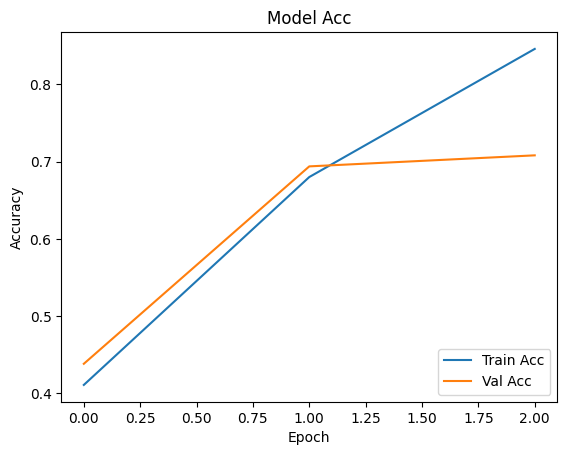

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')

plt.title('Model Acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

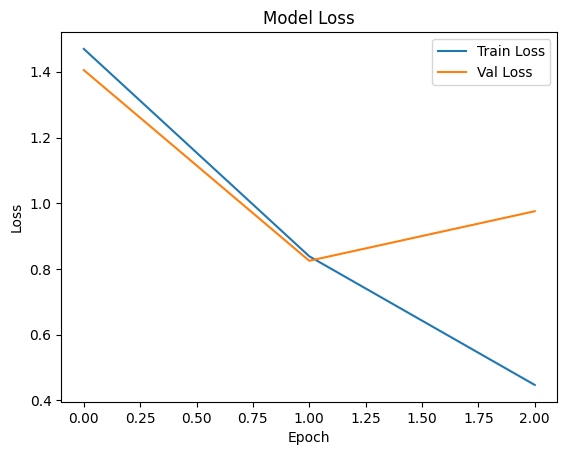

In [48]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

In [54]:
test_sample = ['مركز الشارقة للشعر الشعبي مجلس ضاحية']
sample_sequence = tokenizer.texts_to_sequences([cleaning_text(test_sample[0])])
padded_sample_sequence = pad_sequences(sample_sequence, maxlen=max_length, padding='post')

prediction = model.predict(padded_sample_sequence)

print("Predicted label:", label_encoder.inverse_transform([prediction.argmax()]))

print(f"Prediction probabilities: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Predicted label: ['Finance']
Prediction probabilities: [[6.4746469e-05 9.9878830e-01 1.4399184e-04 1.1814335e-04 9.4131654e-05
  1.9509220e-04 5.9553725e-04]]


The prediction must be 'Culture' but I got 'Finance' .. anyway this is good based on the time left..

# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here:

1. How did you handle text preprocessing? Why did you choose this approach?

tokenization, padding, and removing stopwords to standardize input data and remove harakat and so on, I choose this approachs to make the data good for training the model.

2. Why did you choose this model design?

The model design includes embedding and bidirectional RNN layers to capture semantic meaning and context from text effectively

3. Why did you pick this number of layers or units for the model?

The number of layers and units I selected based on balancing model complexity with performance through experimentations.

4. Why did you select these evaluation methods?

sparse_categorical_crossentropy for catogrical classification tasks, and accuracy I used to measure overall prediction correctness

5. Does your model show signs of overfitting or underfitting? How do you know?

No, Signs of overfitting when we have high training accuracy and
lower validation accuracy, while underfitting shows low accuracy on both datasets (training and testing)

6. What changes could you make to improve the model and fix overfitting or underfitting?

increase numbers of epochs and To address overfitting, apply regularization or simplify the model;
to fix underfitting, increase model complexity or improve feature engineering.


Thanks